In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Train Dataset Shape: (27481, 10)
Test Dataset Shape: (4815, 9)
Train Dataset Sample:
       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                         selected_text sentiment Time of Tweet Age of User  \
0  I`d have responded, if I were going   neutral       morning        0-20   
1                             Sooo SAD  negative          noon       21-30   
2                          bullying me  negative         night       31-45   
3                       leave me alone  negative       morning       46-60   
4                        Sons of ****,  negative          noon       60-70   

       Country  Population -2020  Lan

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 93s 220ms/step - accuracy: 0.4446 - loss: 1.0426 - val_accuracy: 0.6737 - val_loss: 0.7416 - learning_rate: 0.0010
Epoch 2/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 140s 215ms/step - accuracy: 0.7787 - loss: 0.5705 - val_accuracy: 0.6865 - val_loss: 0.7686 - learning_rate: 0.0010
Epoch 3/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 88s 219ms/step - accuracy: 0.8812 - loss: 0.3386 - val_accuracy: 0.6689 - val_loss: 0.9222 - learning_rate: 0.0010
Epoch 4/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step - accuracy: 0.9219 - loss: 0.2257
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
403/403 ━━━━━━━━━━━━━━━━━━━━ 88s 218ms/step - accuracy: 0.9219 - loss: 0.2257 - val_accuracy: 0.6582 - val_loss: 1.0928 - learning_rate: 0.0010
Epoch 5/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 87s 216ms/step - accuracy: 0.9537 - loss: 0.1495 - val_accuracy: 0.6630 - val_loss: 1.3103 - learning_rate: 5.0000e-04
Epoch 6/10
403/403 ━━━━━━━━━━━━━━━━━━━━ 86s 214ms/step - accuracy: 

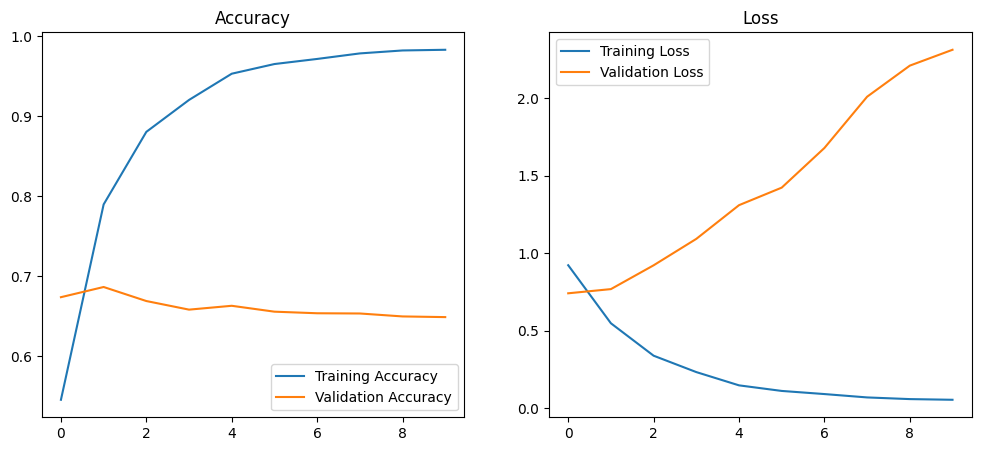

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 353ms/step
Predicted Sentiment: Negative


In [21]:
# Import Required Libraries
import pandas as pd
import numpy as np
import re
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
import matplotlib.pyplot as plt

# Load Datasets
train = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/train.csv', encoding='latin1')
test = pd.read_csv('/kaggle/input/sentiment-analysis-dataset/test.csv', encoding='latin1')

# Display Dataset Information
print("Train Dataset Shape:", train.shape)
print("Test Dataset Shape:", test.shape)
print("Train Dataset Sample:")
print(train.head())

# Use 'selected_text' and 'sentiment' for training
train = train[['text', 'sentiment']].dropna()
test = test[['text', 'sentiment']].dropna()

# Combine Train and Test for Preprocessing
train['split'] = 'train'
test['split'] = 'test'
data = pd.concat([train, test])

# Label Encoding
label_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
data['sentiment'] = data['sentiment'].map(label_mapping)

# Clean Text
def clean_text(text):
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)                # Remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)             # Remove special characters
    return text

data['cleaned_text'] = data['text'].apply(clean_text)

# Split back into train and test
train = data[data['split'] == 'train']
test = data[data['split'] == 'test']

# Balance the Training Data
positive = train[train.sentiment == 2]
neutral = train[train.sentiment == 1]
negative = train[train.sentiment == 0]

neutral_upsampled = resample(neutral, replace=True, n_samples=len(positive), random_state=42)
negative_upsampled = resample(negative, replace=True, n_samples=len(positive), random_state=42)

balanced_train = pd.concat([positive, neutral_upsampled, negative_upsampled])

# Tokenize and Pad Sequences
tokenizer = Tokenizer(oov_token="<OOV>")
tokenizer.fit_on_texts(balanced_train['cleaned_text'])

vocab_size = len(tokenizer.word_index) + 1
max_length = 100  # Maximum sequence length
trunc_type = 'post'
padding_type = 'post'

X_train = tokenizer.texts_to_sequences(balanced_train['cleaned_text'])
X_train = pad_sequences(X_train, maxlen=max_length, truncating=trunc_type, padding=padding_type)

X_test = tokenizer.texts_to_sequences(test['cleaned_text'])
X_test = pad_sequences(X_test, maxlen=max_length, truncating=trunc_type, padding=padding_type)

# Convert Labels to One-Hot Encoding
y_train = pd.get_dummies(balanced_train['sentiment']).values
y_test = pd.get_dummies(test['sentiment']).values

# Build the Model
embedding_dim = 128
model = Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(LSTM(128, return_sequences=False)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Output layer with 3 classes
])

# Compile the Model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Model Summary
model.summary()

# Define Callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, verbose=1)

# Train the Model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=10,
    batch_size=64,
    callbacks=[lr_scheduler]
)

# Evaluate the Model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_accuracy}")

# Visualize Training Progress
plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

# Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()

# Save the Model
model.save('sentiment_model.h5')

# Predict Sentiment for New Texts
def predict_sentiment(text):
    sequence = tokenizer.texts_to_sequences([clean_text(text)])
    padded_sequence = pad_sequences(sequence, maxlen=max_length, padding='post')
    prediction = model.predict(padded_sequence)
    sentiment_classes = ['Negative', 'Neutral', 'Positive']
    return sentiment_classes[np.argmax(prediction)]

# Example Prediction
sample_text = "I am thrilled with this product!"
print(f"Predicted Sentiment: {predict_sentiment(sample_text)}")


In [28]:
s="The movie was good"
print(f"Predicted Sentiment: {predict_sentiment(s)}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Sentiment: Positive


In [31]:
s1="The movie was worst"
print(f"Predicted Sentiment: {predict_sentiment(s1)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted Sentiment: Negative


In [32]:
s2="The movie was ordinary"
print(f"Predicted Sentiment: {predict_sentiment(s2)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Sentiment: Neutral


In [34]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on Test Data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels
y_true_classes = np.argmax(y_test, axis=1)  # Convert one-hot encoded true labels to class labels

# Classification Report
report = classification_report(y_true_classes, y_pred_classes, target_names=['Negative', 'Neutral', 'Positive'])
print("Classification Report:\n", report)



111/111 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step
Classification Report:
               precision    recall  f1-score   support

    Negative       0.66      0.64      0.65      1001
     Neutral       0.63      0.55      0.59      1430
    Positive       0.65      0.79      0.71      1103

    accuracy                           0.65      3534
   macro avg       0.65      0.66      0.65      3534
weighted avg       0.65      0.65      0.65      3534

